In [22]:
import numpy as np
import pandas as pd
import random
from collections import Counter
import pprint
import time
import tensorflow as tf
import sys
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.isnull().sum().sum()

0

In [7]:
print(len(train[train["target"]==0]), " :  Not Spam")
print(len(train[train["target"]==1]), " :  Spam")

983801  :  Not Spam
64774  :  Spam


In [9]:
SAMPLE_SIZE = 50000
df_0 = train[train["target"]==0].sample(SAMPLE_SIZE, random_state = 101)
df_1 = train[train["target"]==1].sample(SAMPLE_SIZE, random_state = 101)
df = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
df= shuffle(df)
df_data, df_test = train_test_split(df, test_size=0.2)

In [10]:
non_spam_counts = Counter()
spam_counts = Counter()
total_counts = Counter()
pp = pprint.PrettyPrinter(indent=4)

In [11]:
for i in range(len(df_data)):  
    if(df_data.iloc[i][2] == 0):
        for word in df_data.iloc[i][1].split(" "):
            non_spam_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in df_data.iloc[i][1].split(" "):
            spam_counts[word] += 1
            total_counts[word] += 1

In [12]:
print("The most used word in spam questions: ")
pp.pprint(spam_counts.most_common()[0:20])

The most used word in spam questions: 
[   ('the', 25311),
    ('to', 17425),
    ('Why', 15990),
    ('and', 13738),
    ('a', 13203),
    ('of', 12245),
    ('in', 10204),
    ('is', 9431),
    ('are', 9074),
    ('do', 9027),
    ('that', 7722),
    ('it', 5543),
    ('they', 5496),
    ('I', 5484),
    ('people', 5395),
    ('for', 5238),
    ('with', 4601),
    ('so', 4272),
    ('you', 4258),
    ('their', 4232)]


In [13]:
print("The most used word in non spam questions: ")
pp.pprint(non_spam_counts.most_common()[0:20])

The most used word in non spam questions: 
[   ('the', 19742),
    ('What', 13385),
    ('a', 12217),
    ('to', 12003),
    ('in', 11187),
    ('is', 10152),
    ('of', 10133),
    ('I', 9726),
    ('How', 8475),
    ('and', 7257),
    ('are', 6265),
    ('do', 6069),
    ('for', 5989),
    ('you', 5783),
    ('can', 3905),
    ('Why', 3538),
    ('it', 3412),
    ('my', 3235),
    ('Is', 3169),
    ('that', 2861)]


In [14]:
print("The most used word in all questions: ")
pp.pprint(total_counts.most_common()[0:20])

The most used word in all questions: 
[   ('the', 45053),
    ('to', 29428),
    ('a', 25420),
    ('of', 22378),
    ('in', 21391),
    ('and', 20995),
    ('is', 19583),
    ('Why', 19528),
    ('What', 16436),
    ('are', 15339),
    ('I', 15210),
    ('do', 15096),
    ('How', 12224),
    ('for', 11227),
    ('that', 10583),
    ('you', 10041),
    ('it', 8955),
    ('with', 7332),
    ('Is', 7313),
    ('be', 6601)]


In [16]:
#transforming text into numbers
vocab = set(total_counts.keys())
print(len(vocab))

90772


In [17]:
vocab_vector = np.zeros((1, 200)) 
pp.pprint(vocab_vector.shape)
pp.pprint(vocab_vector)

(1, 200)
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])


In [19]:
word_column_dict = {}
p=0
for word,count in list(total_counts.most_common()[0:200]):
    word_column_dict[word] = p
    p+=1
word_column_dict

{'the': 0,
 'to': 1,
 'a': 2,
 'of': 3,
 'in': 4,
 'and': 5,
 'is': 6,
 'Why': 7,
 'What': 8,
 'are': 9,
 'I': 10,
 'do': 11,
 'How': 12,
 'for': 13,
 'that': 14,
 'you': 15,
 'it': 16,
 'with': 17,
 'Is': 18,
 'be': 19,
 'people': 20,
 'have': 21,
 'on': 22,
 'they': 23,
 'or': 24,
 'can': 25,
 'my': 26,
 'their': 27,
 'so': 28,
 'as': 29,
 'from': 30,
 'not': 31,
 'if': 32,
 'an': 33,
 'does': 34,
 'like': 35,
 'when': 36,
 'Do': 37,
 'by': 38,
 'about': 39,
 'get': 40,
 'your': 41,
 'would': 42,
 'there': 43,
 'Are': 44,
 'If': 45,
 'will': 46,
 'who': 47,
 'all': 48,
 'at': 49,
 'we': 50,
 'some': 51,
 'Trump': 52,
 'think': 53,
 'than': 54,
 'Can': 55,
 'more': 56,
 'was': 57,
 'should': 58,
 'many': 59,
 'women': 60,
 'best': 61,
 'but': 62,
 'did': 63,
 'what': 64,
 'this': 65,
 'most': 66,
 'any': 67,
 'has': 68,
 'why': 69,
 'he': 70,
 'other': 71,
 'just': 72,
 "don't": 73,
 'his': 74,
 'Indian': 75,
 'Which': 76,
 'make': 77,
 'good': 78,
 'how': 79,
 'being': 80,
 'me': 81,

In [20]:
def update_input_layer(text):
    
    global vocab_vector
    
    
    vocab_vector *= 0
    for word in text.split(" "):
        if word in word_column_dict:
            vocab_vector[0][word_column_dict[word]] += 1
        
    return vocab_vector.tolist()[0]

print(update_input_layer("the the"))

[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
x_train = [update_input_layer(df_data.iloc[i][1]) for i in range(len(df_data))]
y_train = [df_data.iloc[i][2] for i in range(len(df_data))]

In [24]:
model = Sequential()
model.add(Dense(128,input_dim=200, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               25728     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,857
Trainable params: 25,857
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(np.asarray(x_train), np.asarray(y_train), epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.4431 - accuracy: 0.7973
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4146 - accuracy: 0.8128
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4021 - accuracy: 0.8205
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3911 - accuracy: 0.8271
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3811 - accuracy: 0.8324
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3718 - accuracy: 0.8375
Epoch 7/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3626 - accuracy: 0.8426
Epoch 8/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3546 - accuracy: 0.8460
Epoch 9/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3467 - accuracy: 0.8498
Epoch 10/100
2500/2500 [==============================] - 6s 2ms/step - l

2500/2500 [==============================] - 6s 2ms/step - loss: 0.1676 - accuracy: 0.9326
Epoch 80/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1659 - accuracy: 0.9329
Epoch 81/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1659 - accuracy: 0.9331
Epoch 82/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1647 - accuracy: 0.9330
Epoch 83/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1645 - accuracy: 0.9337
Epoch 84/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1634 - accuracy: 0.9344
Epoch 85/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1621 - accuracy: 0.9353
Epoch 86/100
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1609 - accuracy: 0.9356
Epoch 87/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1608 - accuracy: 0.9355
Epoch 88/100
2500/2500 [==============================] - 7s 3ms/step - loss:

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

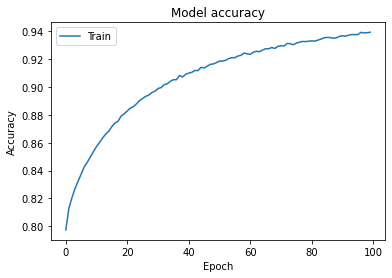

In [29]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

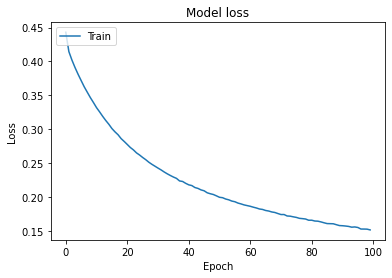

In [30]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
x_test = [update_input_layer(df_test.iloc[i][1]) for i in range(len(df_test))]
predictions = model.predict(np.asarray(x_test))

625/625 [==============================] - 1s 2ms/step


In [34]:
k=0
for i in range(len(df_test)):
    if(predictions[i][0]>0.5 and df_test.iloc[i,2]==1):
        k+=1
    elif(predictions[i][0]<0.5 and df_test.iloc[i,2]==0):
        k+=1

In [35]:
print(k/len(df_test)*100, "% of testing data was well predicted") 

76.375 % of testing data was well predicted


In [36]:
print("type \t : \t question\n")
for d in range(5):
    r = random.randrange(0,len(df_test))
    s = "non spam question  :"
    q = "===> predicted ===> non spam question "
    if df_test.iloc[r,2]==1:
        s = "spam question  :"
    if predictions[r][0]>0.5 : 
        q = "===> predicted   ===> spam question "
        
    print(s+df_test.iloc[r,1]+q)

type 	 : 	 question

spam question  :Are there any left-wing debators as strong as Ben Shapiro? If so, who?===> predicted ===> non spam question 
spam question  :Why are Hindus so obsessed with cows?===> predicted   ===> spam question 
non spam question  :How do you treat a 2 year old child that cries too much?===> predicted ===> non spam question 
non spam question  :What made you stop being a free speech absolutist?===> predicted ===> non spam question 
spam question  :Are Tamils mistreated and seen as an inferior race in India?===> predicted   ===> spam question 
